# <u><b>Project title: Cardiovascular risk prediction</b></u>

---
PROJECT TYPE- **SUPERVISED ML (CLASSIFICATION)**


> CONTRIBUTION- TEAM


1.   NEHA JADHAV
2.   AKANKSHA JADHAV






**PROBLEM DESCRIPTION-**

Cardiovascular diseases (CVDs) are the leading cause of death globally, taking an estimated 18.6 million lives each year, which accounts for 33% of all the global deaths. CVDs are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions. More than four out of five CVD deaths are due to heart attacks and strokes, and one third of these deaths occur prematurely in people under 70 years of age.

It is important to detect cardiovascular disease as early as possible so that management with counselling and medicines can begin.

Our main aim here is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).

### <b>**PROJECT DESCRIPTION**:</b>

The problem and aim stated above can be solved with the help of machine learning models and the data that we have. The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

### <b>Variables:</b>
Each attribute is a potential risk factor. These attributes include demographic, behavioral, and medical risk factors.

### <b>Defining the columns:</b>

### <b>Demographic:</b>

   • Sex: male or female("M" or "F")
  
   • Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

### <b>Behavioral:</b>
  
   • is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
  
   • Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

### <b>Medical( history):</b>

   • BP Meds: whether or not the patient was on blood pressure medication (Nominal)
   
   • Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
  
   • Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
  
   • Diabetes: whether or not the patient had diabetes (Nominal) 

### <b>Medical(current):</b>

   • Tot Chol: total cholesterol level (Continuous)
   
   • Sys BP: systolic blood pressure (Continuous)
   
   • Dia BP: diastolic blood pressure (Continuous)
   
   • BMI: Body Mass Index (Continuous)
   
   • Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
   
   • Glucose: glucose level (Continuous)

### <b>Predict variable (desired target):</b>

   • 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

##**GITHUB LINK:** 

##**IMPORTING AND LOADING THE DATA**

In [43]:
#Importing the LIBRARIES
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [44]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
#Loading the dataset
cvd_df=pd.read_csv('/content/drive/MyDrive/Capstone project-03/data_cardiovascular_risk.csv')

##**EXPLORATORY DATA ANALYSIS**

In [46]:
#Getting the first 10 rows of dataset
cvd_df.head(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0


In [47]:
#checking the last 10 rows of the dataset
cvd_df.tail(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3380,3380,56,1.0,F,YES,20.0,0.0,0,0,0,240.0,125.0,79.0,27.38,80.0,82.0,0
3381,3381,63,1.0,F,NO,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
3382,3382,43,4.0,M,NO,0.0,0.0,0,1,0,260.0,129.0,90.0,25.29,70.0,62.0,0
3383,3383,57,3.0,F,NO,0.0,0.0,0,0,0,210.0,131.0,85.0,26.59,70.0,77.0,0
3384,3384,61,1.0,F,NO,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [48]:
#checking the information of the dataset
cvd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [49]:
#Shape of the dataset
cvd_df.shape

(3390, 17)

We have 3,390 observations and 17 columns.

In [50]:
#checking the columns
cvd_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [51]:
#description of the data in DataFrame
cvd_df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [52]:
#Checking the distribution of the target variable
cvd_df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [53]:
#A function to produce visualisations for gaining insights and doing analysis
def create_visualisation(col: str, factor :str = 'Diabetes', data : pd.DataFrame = cvd_df, t_col: str = 'TenYearCHD',\
                         vis_type: str= 'barplot',percent: bool = False):
  """A function that gives a visualisation which shows the
     effect of a  particular variable on the target variable. 
     Also checks for the impact percentage if specified by the user."""
  
  plt.figure(figsize=(15,8))

  #For Barplot visualisation
  if vis_type == 'barplot':
    analysis_df = data.groupby(col)[t_col].sum().reset_index()
    sns.barplot(data=analysis_df, x=col, y=t_col)
    plt.title(f'Distribution of positive cases of CHD over different categories of column {col.capitalize()}',size=18)
  
  #For Countplot visualisation
  if vis_type == 'countplot':
    sns.countplot(x=data[col],hue=data[t_col])
    plt.title(f'The effect of column {col.capitalize()} on the target column {t_col}',size=20)
    plt.legend(['No Risk','At Risk'])
  
  #For Lineplot visualisation
  if vis_type == 'lineplot':
    analysis_df = data.groupby(col)[t_col].sum().reset_index()
    plt.plot(analysis_df[col],analysis_df[t_col])
    plt.title(f'Distribution of positive cases of CHD over different values of column {col.capitalize()}',size=18)
  
  #General plot adjusting commands
  plt.xlabel(col.capitalize(),size=15)
  plt.ylabel(t_col,size=15)
  plt.show()
  
  #To calculate the impact percentage of a particular column
  if percent == True:
    analysis_df = data.groupby(col)[t_col].sum().reset_index()
    count_df = data[col].value_counts().reset_index()
    p = math.ceil(((analysis_df.loc[1][1]/count_df.loc[1][1]) - (analysis_df.loc[0][1]/count_df.loc[0][1]))*100)
    print(f'\nAnalysis result: \n{factor} increases the chances of a positive CHD risk factor by around {p}%')

### <b>Age group most likely to have a positive CHD risk factor.</b>

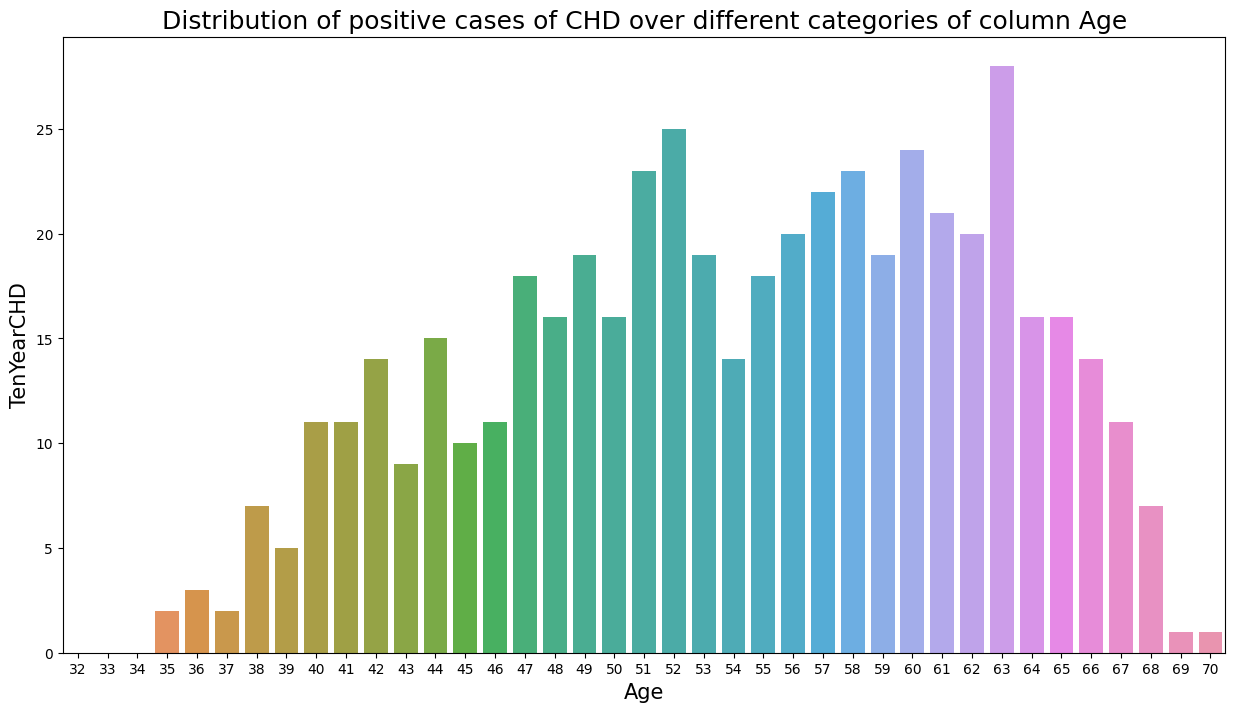

In [54]:
#Analysis of the column Age
create_visualisation(col='age')

<b>As we can see, the age group that is most likely to have a posititve CHD risk factor is from 47 to 65.</b>

### <b>Does the education level affect the ten year CVD risk factor:</b>

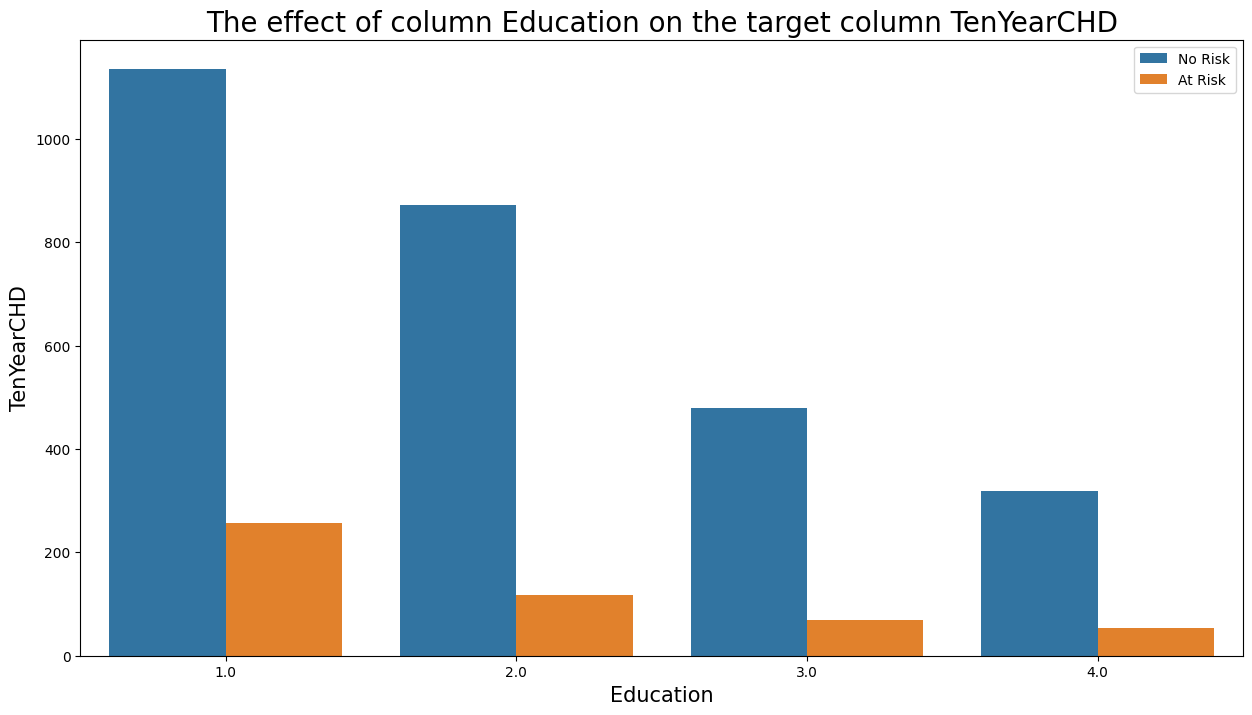

In [55]:
#Analysis of the column education
create_visualisation(col='education',vis_type='countplot')

<b>As we can see that, most of the "At Risk" cases are in the 1st level of education and least in the 4th level. This is a pretty misleading result because the number of "At Risk" cases here seems to be affected by the total number of people in that category. Therefore we can infer that this is not a good comparitive point.</b>

### <b>What sex is most likely to suffer from CHD's:</b>

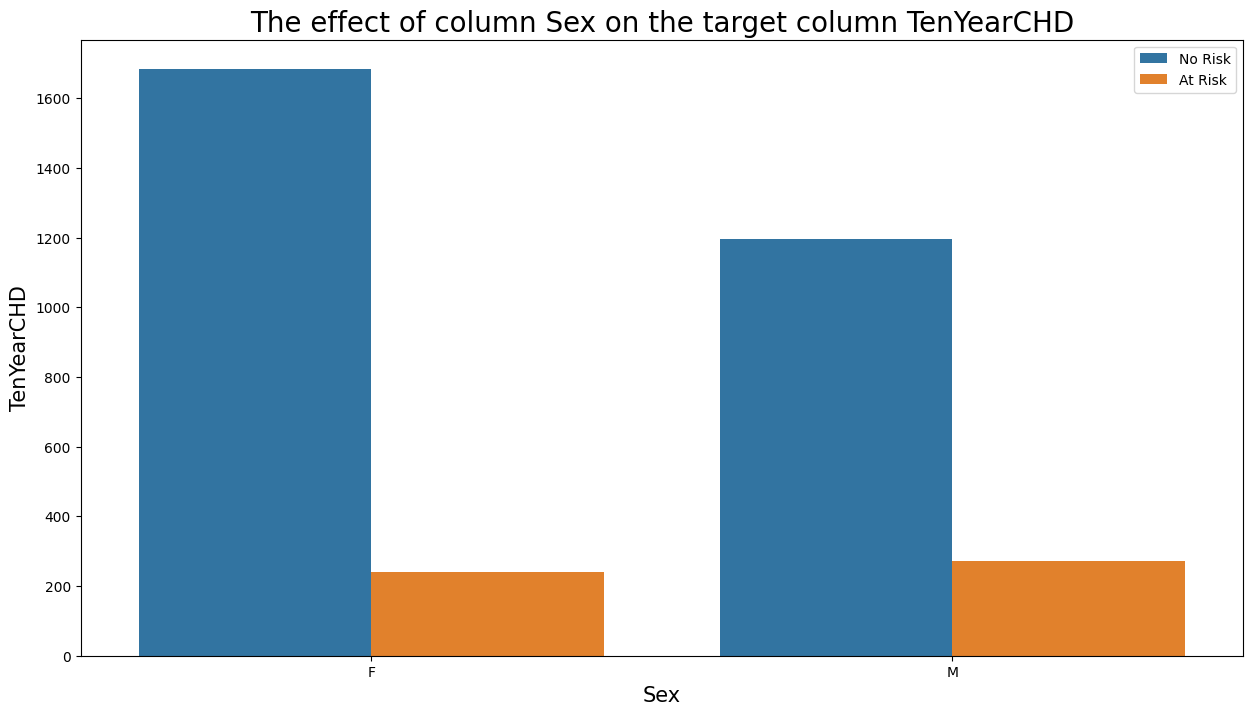


Analysis result: 
Being a Male increases the chances of a positive CHD risk factor by around 7%


In [56]:
#Analysis of the Sex column
create_visualisation(col='sex',vis_type='countplot',percent=True,factor='Being a Male')

### <b>The effect of smoking on CHD risk:</b>

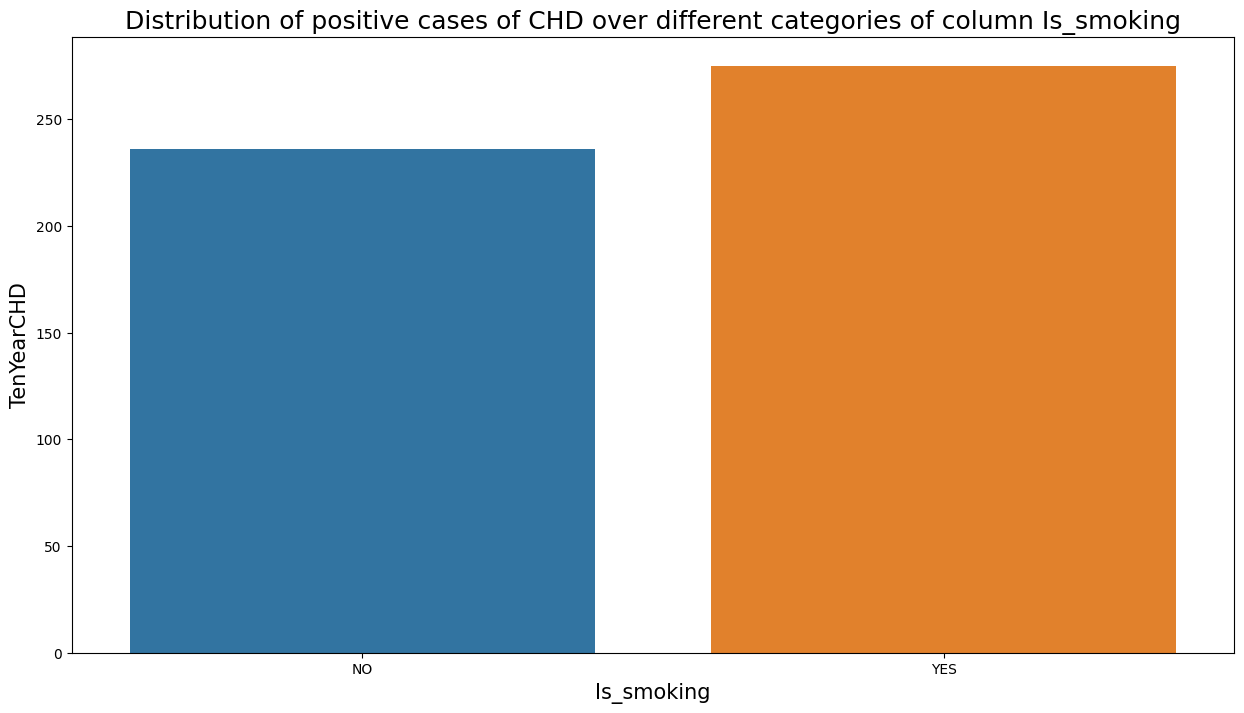


Analysis result: 
Smoking increases the chances of a positive CHD risk factor by around 3%


In [57]:
#Analysis of the is_smoking column
create_visualisation(col='is_smoking',factor='Smoking',percent=True)

### <b>How does being on blood pressure medication affect the CHD risk factor:</b>

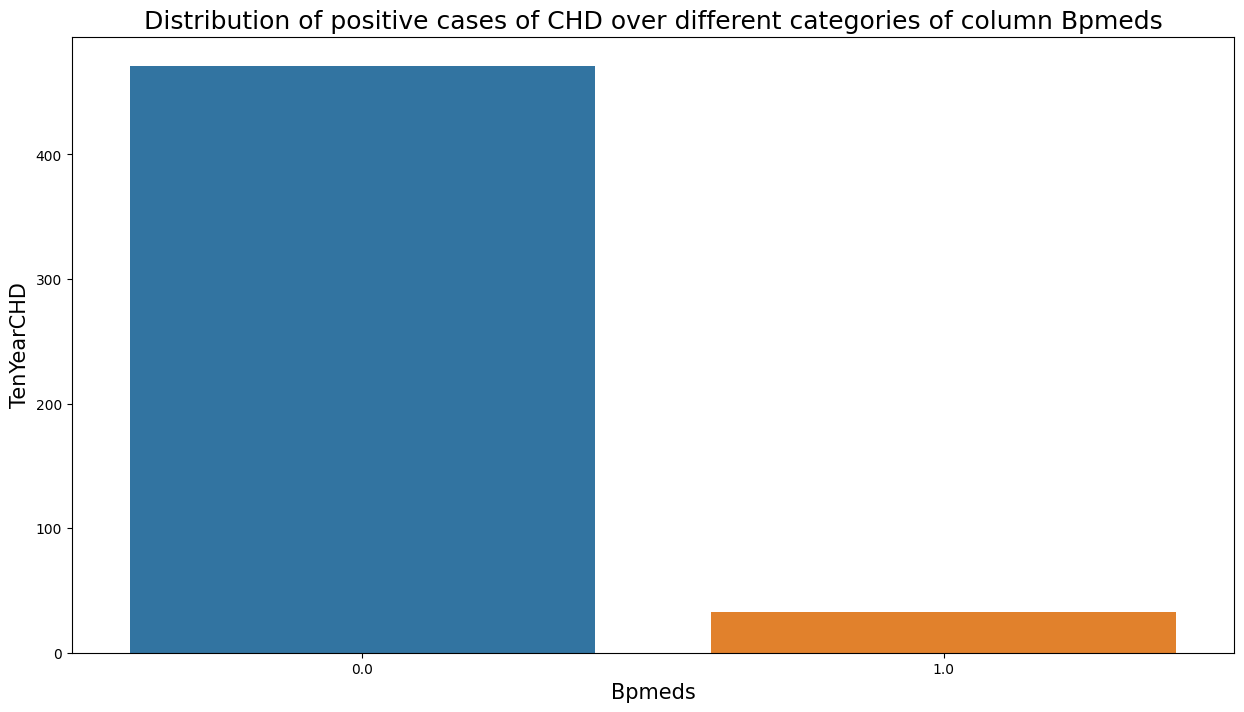


Analysis result: 
Having BP medications increases the chances of a positive CHD risk factor by around 19%


In [58]:
#Analysis of the BPMeds column
create_visualisation(col='BPMeds',factor='Having BP medications',percent=True)

### <b>Does hypertension affect the chances of having a positive CHD risk factor:</b>

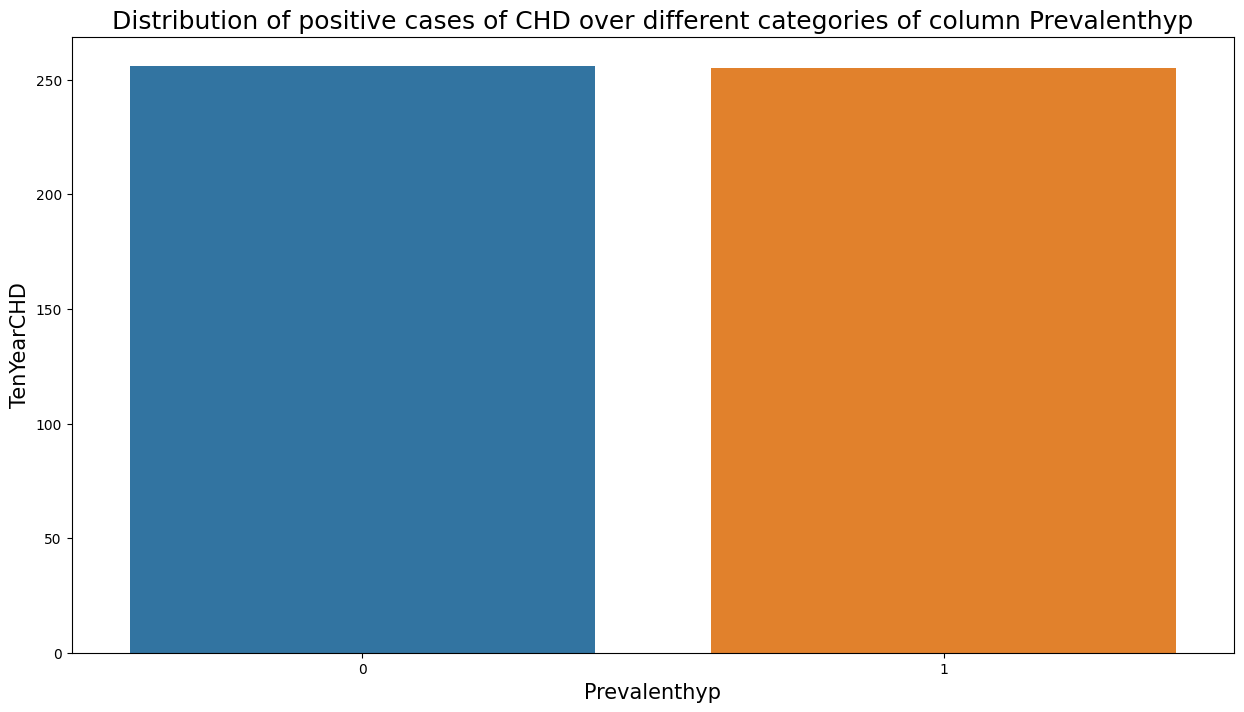


Analysis result: 
Prevalent Hypertension increases the chances of a positive CHD risk factor by around 13%


In [59]:
#Analysis of the column prevalentHyp
create_visualisation(col='prevalentHyp',percent=True,factor='Prevalent Hypertension')

### <b>How does previous strokes affect future CHD risk:</b>

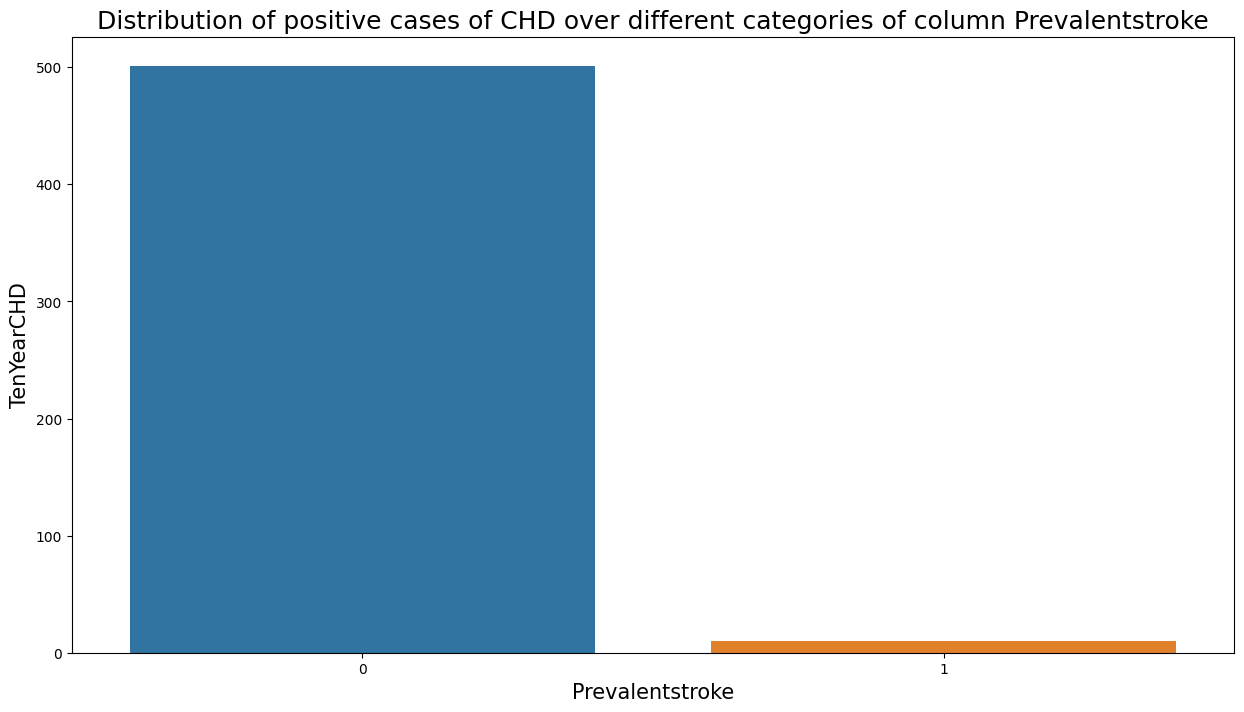


Analysis result: 
Having a prevalent stroke increases the chances of a positive CHD risk factor by around 31%


In [60]:
#Analysis of the column prevalentStroke
create_visualisation(col='prevalentStroke', percent=True,factor='Having a prevalent stroke')

### <b>Does Diabetes affect the chances of having a positive CHD risk factor:</b>

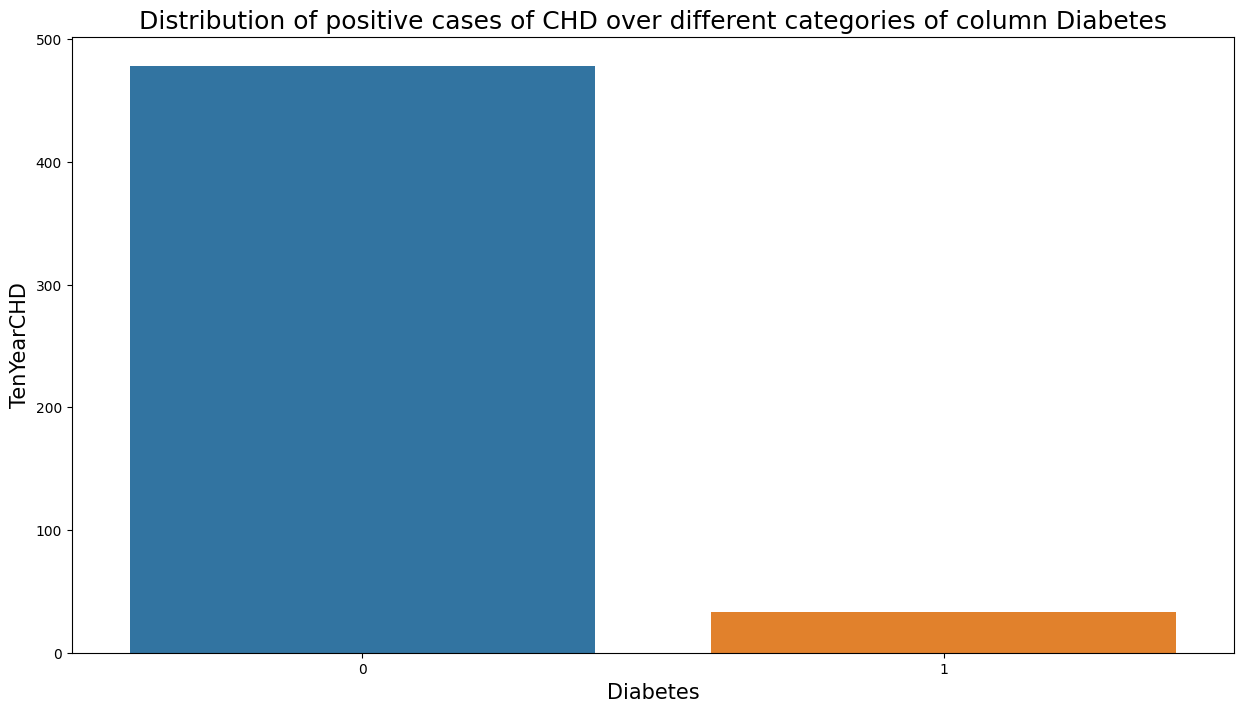


Analysis result: 
Diabetes increases the chances of a positive CHD risk factor by around 24%


In [61]:
#Analysis of the column diabetes
create_visualisation(col='diabetes',percent=True,factor='Diabetes')

### <b>The remaing columns are all current medical values. These values don't particularly signify a trend therefore I will just plot the number of positive cases for all the values each variable can take.</b>

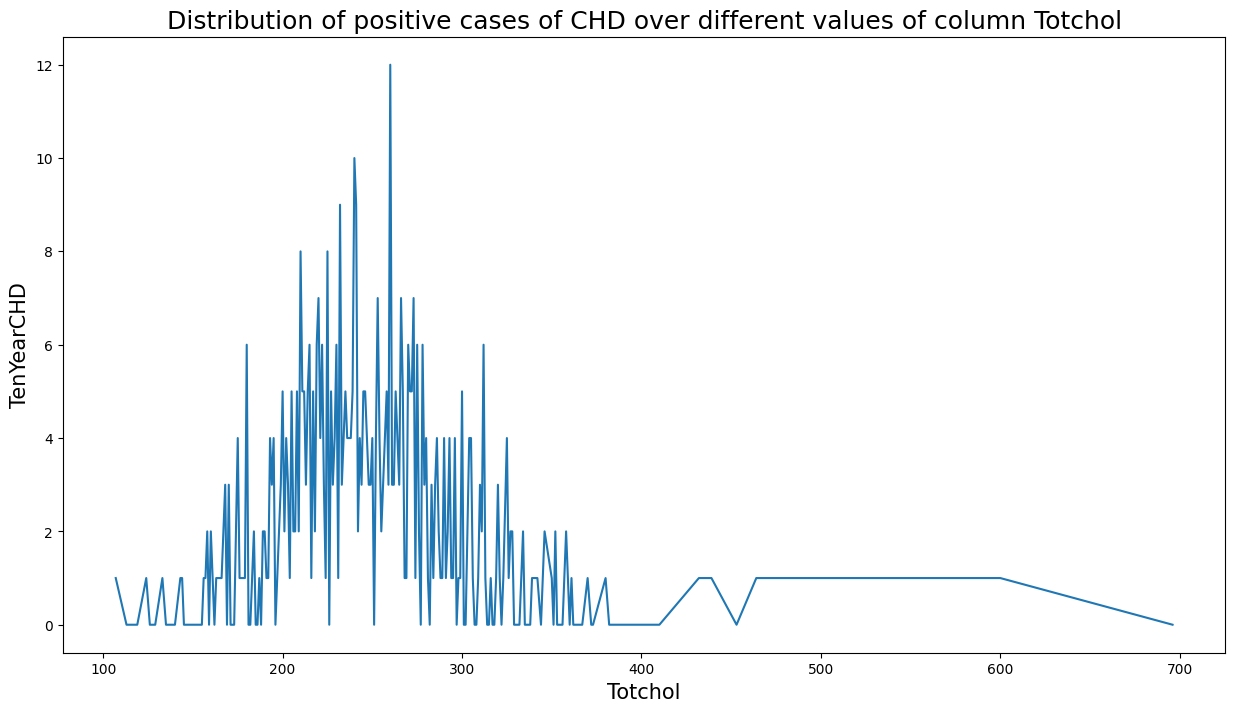

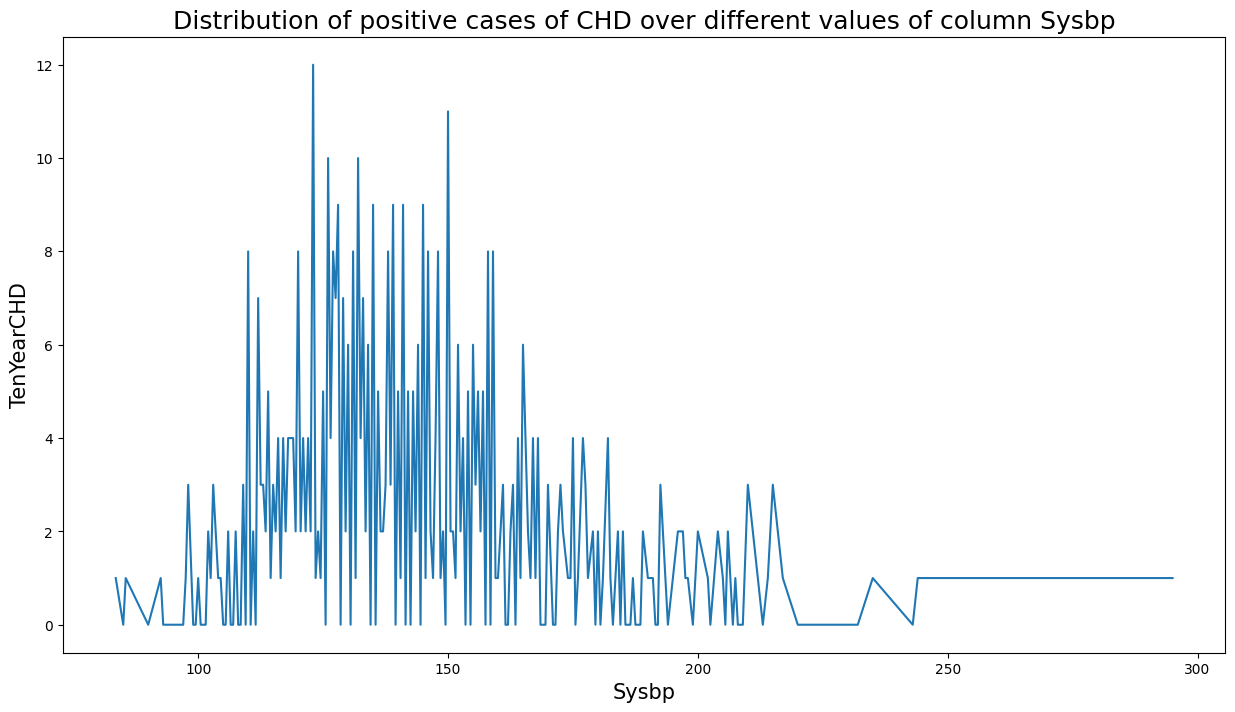

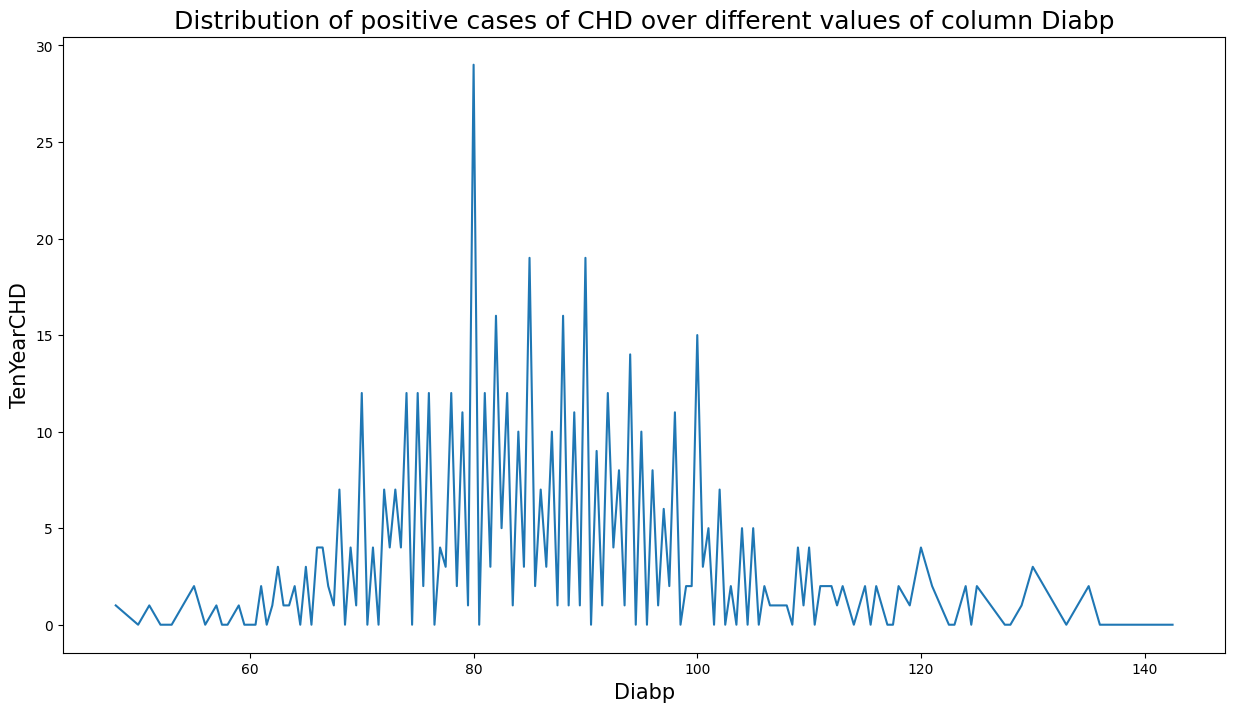

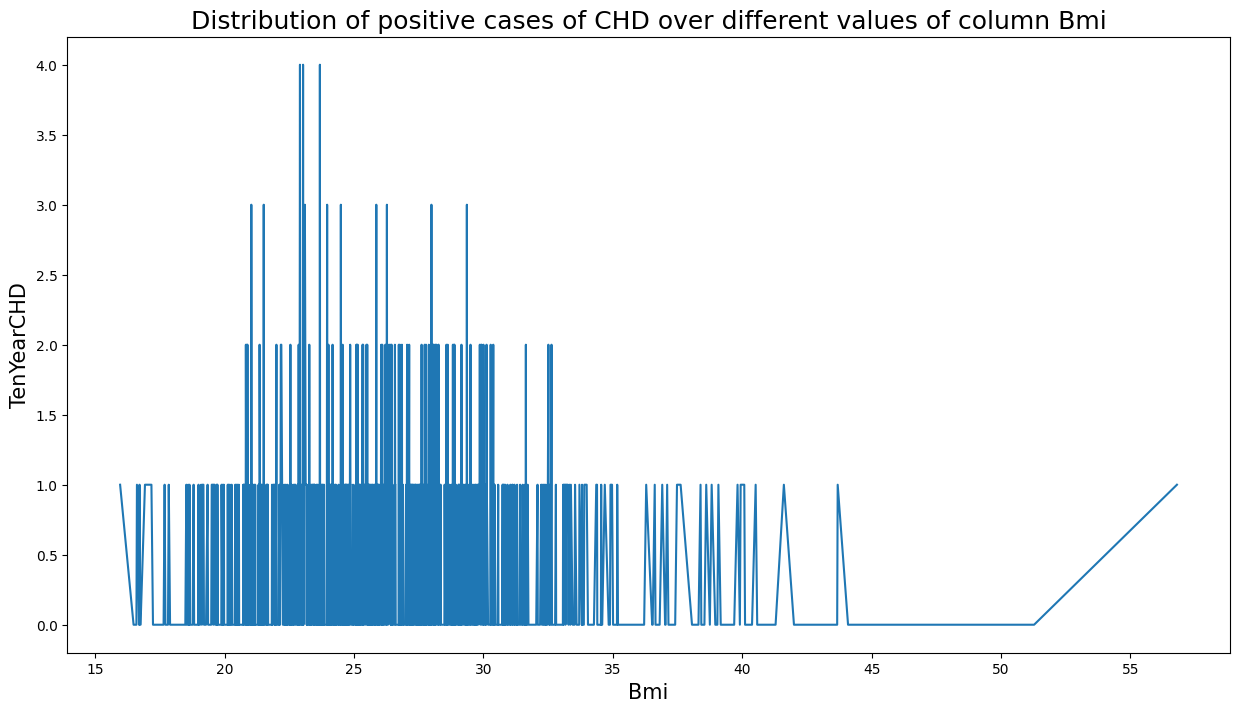

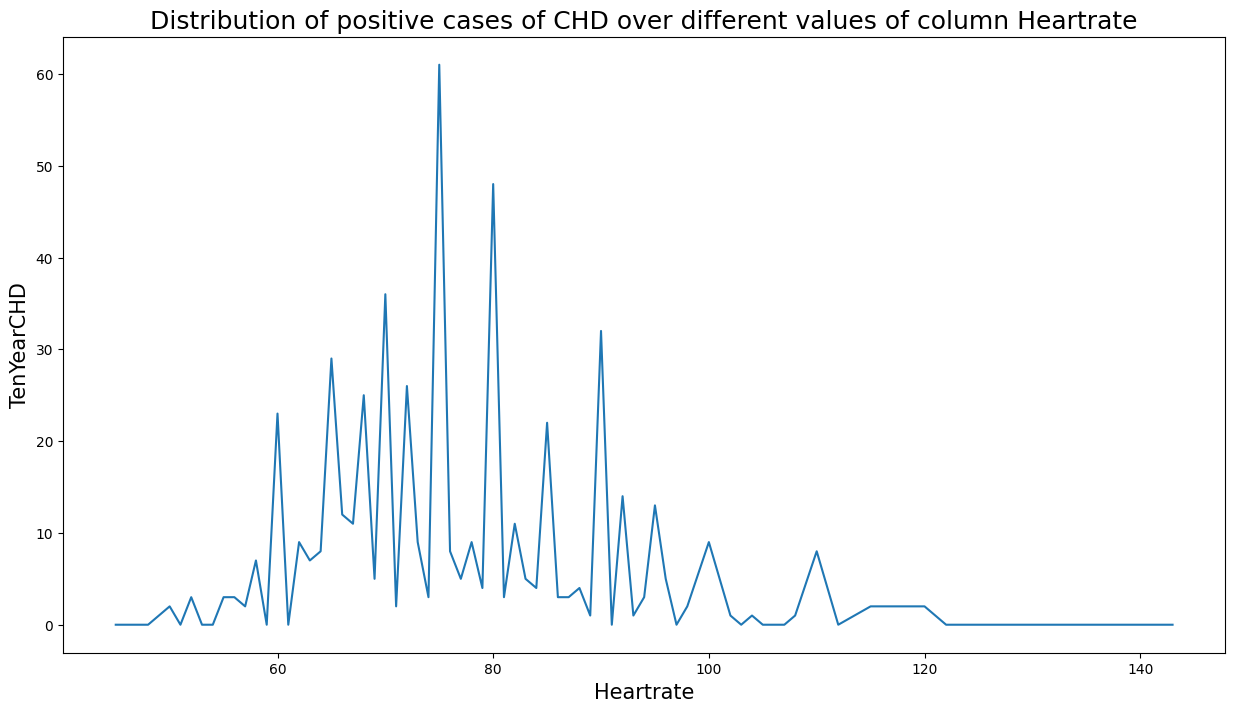

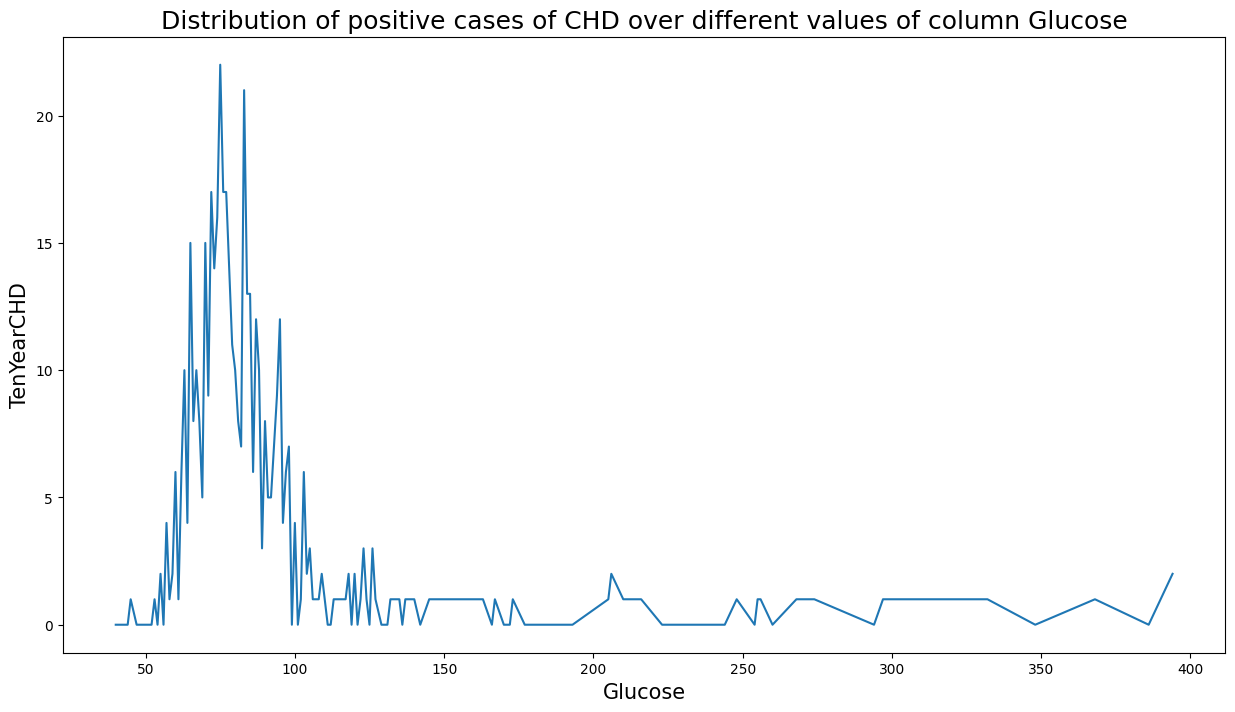

In [62]:
#Analysis for the remaining (current medical details) columns
curr_med_list = ['totChol','sysBP','diaBP','BMI','heartRate','glucose']
for col in curr_med_list:
  create_visualisation(col=col,vis_type='lineplot')

<b>From the visualisations we can see that for all these variables, most of the positive cases are for the medium range, this is because the dataset mostly contains people with medium ranges for these variables. In theory, consistent high and low values for all these variables are dangerous and can have an increasing effect on the CHD risk factor.</b>

<b>The medium ranges for all these variables according to our data are:</b>
  * Total cholestrol: 170-310
  * Systolic blood pressure: 100-180
  * Diastolic blood pressure: 70-100
  * BMI: 20-32
  * Heart rate: 60-95
  * Glucose: 50-110

###**CLEANING THE DATASET**

### <b>Handling null values:</b>

Missing data is defined as the values or data that is not stored (or not present) for some variable/s in the given dataset.

Missing values can bias the results of the machine learning models and/or reduce the accuracy of the model. 

Therefore it is an essential practice to handle null values before training our model. There are two main ways of handling null values, one is to delete the observations containing null values and the other is to impute the null values with some meaning full values.

In [63]:
#Checking for null values in our dataset
cvd_df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

I'll be using a mixed approach of imputing null values with some meaningfull value and deleting the observations with null values.

Since the glucose column has a lot of null values, I'll impute them with the mean glucose value. After this, the number of null values present will be of a very small order when compared to the size of the dataset, therefore I'll just delete them.

In [65]:
#Imputing values for glucose column
mean = math.ceil(cvd_df['glucose'].mean())     #getting the mean value of the glucose column
cvd_df['glucose'].fillna(mean, inplace=True)   #Imputing the null values with mean value

In [66]:
#Checking if the imputation worked
cvd_df.isnull().sum()

id                  0
age                 0
education          87
sex                 0
is_smoking          0
cigsPerDay         22
BPMeds             44
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            38
sysBP               0
diaBP               0
BMI                14
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

Glucose column now has 0 null values, so our imputation has worked. Now we can delete the rest of the null values.

In [67]:
#Deleting the rest of the null values
cvd_df.dropna(inplace=True)

In [68]:
#Checking if the null values are dropped properly
cvd_df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

<b>As we can see, there are no more null values present, therefore we can move forward.</b>

###<b>Handling duplicate values:</b>

When two features have the same set of values they are known as duplicate values.

Duplicate values can cause detrimental effect on our accuracy. Duplicate values can ruin the split between train,test and validation set, which ultimately leads to a biased performance estimates that disappoint the model in production.

The best way of dealing with duplicate values is to delete them.

In [69]:
#Checking for duplicate values
cvd_df.duplicated().sum()

0

<b>As we can see there are no duplicate values, so we can move ahead.</b>

###<b>Removing outliers:</b>

Outliers are those data points that are significantly different from the rest of the data points in the dataset. These can cause the data to skew and affect the accuracy of the ML model.

In [70]:
#Defining a list with numerical columns that can have outliers
poss_outlier_cols = ['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

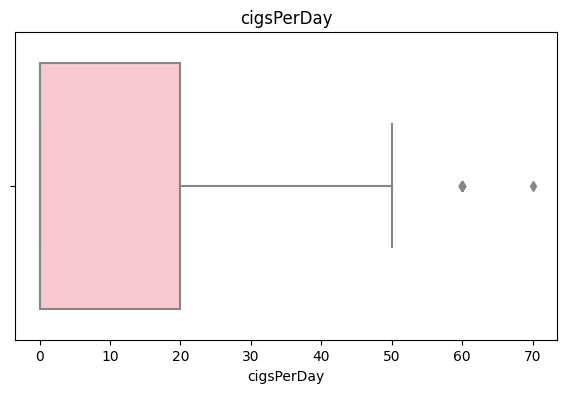

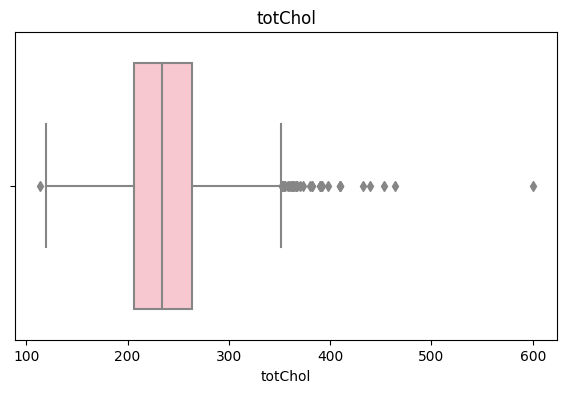

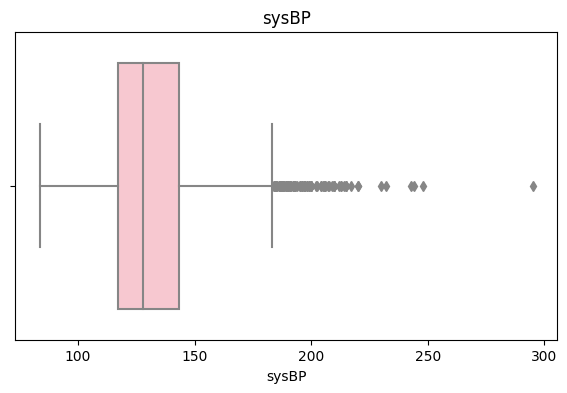

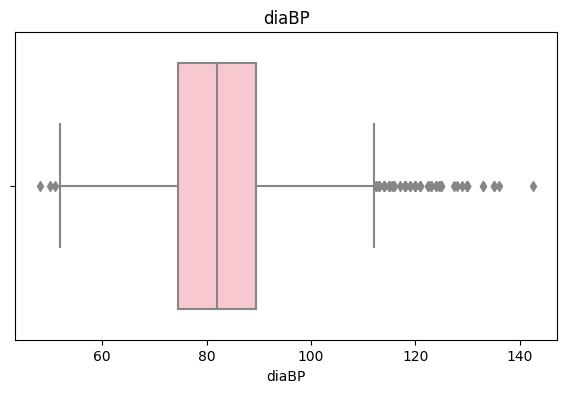

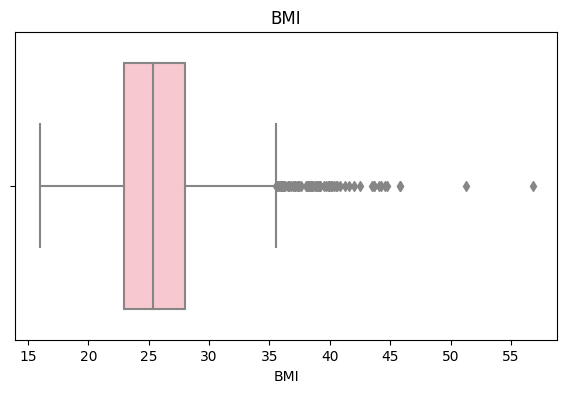

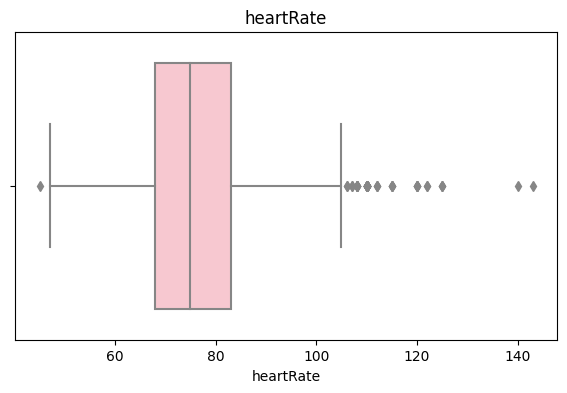

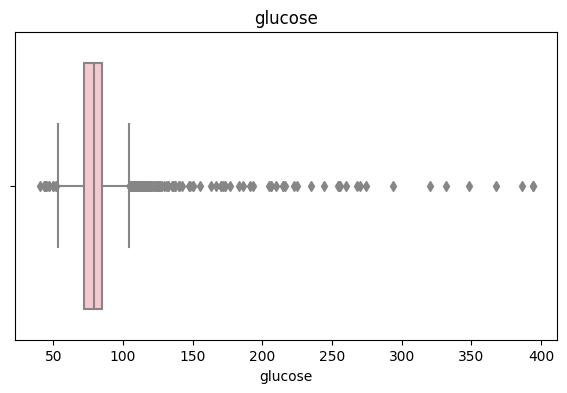

In [78]:
# Now create a boxplot to check the outliers 
for i in poss_outlier_cols:
  fig = plt.figure(figsize=(7, 4))
  ax = fig.gca()
  features = cvd_df[i]
  sns.boxplot(x=features ,color= 'pink')
  ax.set_title(i)
plt.show()

<b>From the boxplots we can infer that all these columns have outliers, but practically speaking even though they are not "normal" observations, they are still possible. Ruling out such possible scenerios can be harmful for our prediction.</b>

<b>Therefore I will allow these outliers to be in the dataset.</b>

## <b>4.Feature Engineering:</b>

### <b>Feature Encoding:</b>

Machine learning models can only work with numerical values and therefore important categorical columns have to converted/encoded into numerical variables. This process is known as <b>Feature Encoding</b>

Here we have two columns that require encoding and they are "sex" and "is_smoking". 

In [79]:
#The dataframe before encoding
cvd_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [80]:
#Encoding the categorical columns
cvd_df['sex'] = np.where(cvd_df['sex']=='M',1,0)                                        #1st way to encode(using numpy library)
cvd_df['is_smoking'] = cvd_df['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)       #2nd way to encode(using the apply and lambda function)   

In [81]:
#Checking if the encoding has worked
cvd_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


### <b>Grouping columns for better understanding:</b>

There are many columns in this dataset. Some of them can be combined to give a better column which actually gives out better and precise information, which would also impact the prediction in a positive way.

#### <b>a. SmokeLevel:</b>
At first we can combine the is_smoking and cigsPerDay column. If a person has cigsPerDay value as something greater than 0, then it obviously means he is a smoker. In that case the column is_smoking would be of no value. 

Now I will combine both of these columns into a single column which would be an ordinal column called SmokeLevel that contains the level of smoking for each person.

In [82]:
def smoke_level(cpd: float):
  """A function that returns the Smoking level
     by taking cigarettes per day as an input."""
  if cpd==0:                    #Non smoker
    return 1
  elif cpd>0 and cpd<=10:       #Smoker with more than 0 and less than 10 cigs per day
    return 2
  elif cpd>10 and cpd<=20:      #Smoker with more than 10 and less than 20 cigs per day 
    return 3
  elif cpd>20 and cpd<=30:      #Smoker with more than 20 and less than 30 cigs per day
    return 4
  elif cpd>30 and cpd<=40:      #Smoker with more than 30 and less than 40 cigs per day
    return 5        
  else:                         #Smoker with more than 40 cigs per day
    return 6  

In [85]:
#Creating the SmokeLevel column
cvd_df['SmokeLevel'] = cvd_df['cigsPerDay'].apply(lambda x: smoke_level(x))

In [88]:
#Removing columns upon whom grouping has been done
cvd_df.drop(columns={'is_smoking','cigsPerDay'},axis=1,inplace=True)

In [89]:
#Checking if the new column creation has worked
cvd_df.head()

,id,age,education,sex,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,SmokeLevel
1,1,36,4.0,1,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,1
2,2,46,1.0,0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,2
3,3,50,1.0,1,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,3
4,4,64,1.0,0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,4
5,5,61,3.0,0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,1


As we can see, the new column "SmokeLevel" has been created with correct values.

#### <b>b. BPLevel:

Next, I will combine the "sysBP" and "diaBP" columns to create a new column called the "BPLevel".</b>

Before diving into this step let us have a look at what are the BP levels defined by the American heart association.


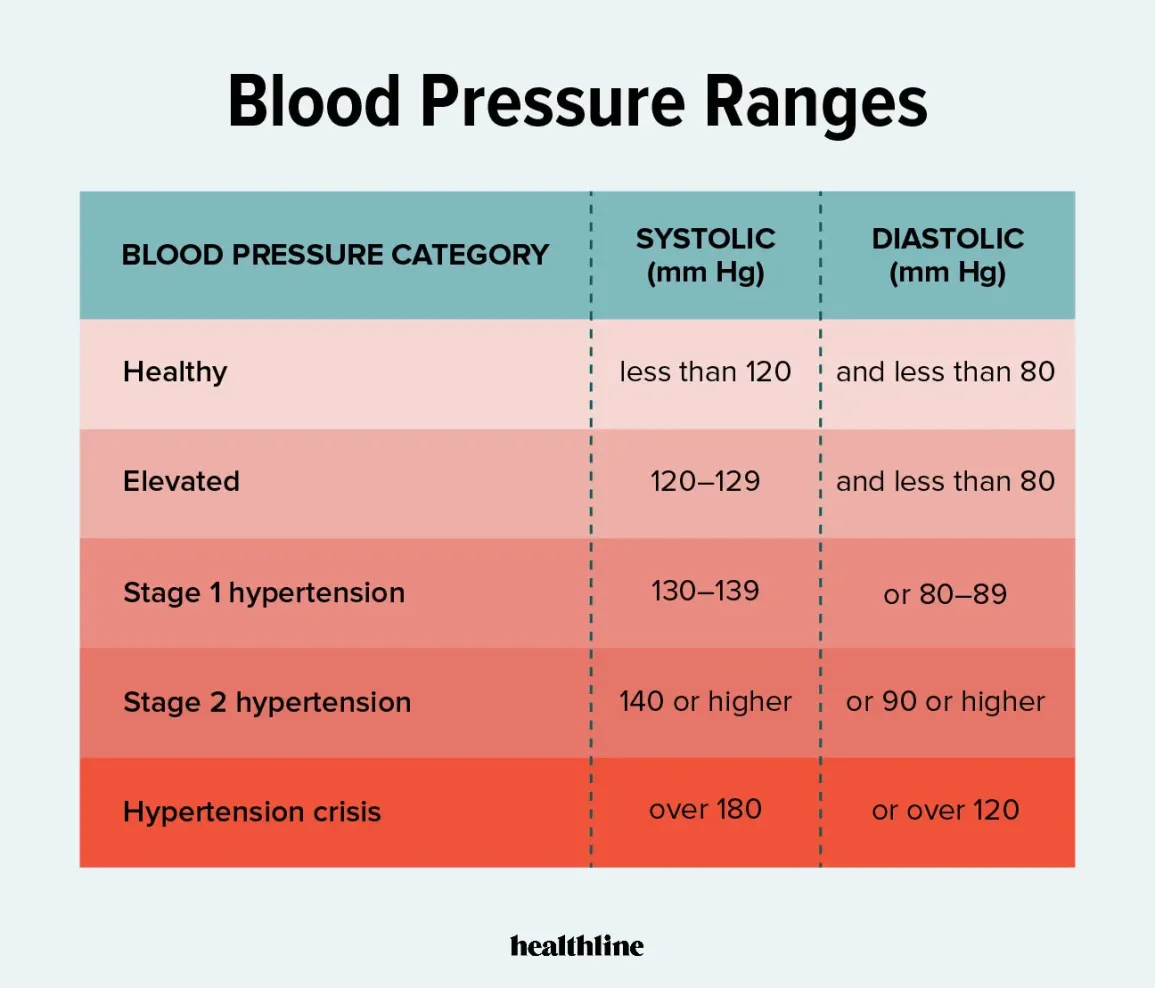

In [90]:
def BPLevel_assigner(s: float,d:float):
  """A function that returns the Blood Pressure level by taking the 
     Systolic blood pressure and Diastolic blood pressure as inputs"""
  if s<120 or d<80:                               #Normal level
    return 1
  elif (s>=120 and s<130) or d<80:                #Elevated level
    return 2
  elif (s>129 and s<140) or (d>79 and d<90):       #High BP stage 1
    return 3
  elif (s>139 and s<180) or (d<89 and d<120):      #High BP stage 2
    return 4
  elif s>179 or d>119:                             #Hypertensive crisis
    return 5         

In [91]:
#Creating the BPLevel column
cvd_df['BPLevel'] = cvd_df.apply(lambda x: BPLevel_assigner(x['sysBP'],x['diaBP']),axis=1)

In [92]:
#Removing columns upon whom grouping has been done
cvd_df.drop(columns={'sysBP','diaBP'},axis=1,inplace=True)

In [93]:
#Checking if the BPLevel column is created properly
cvd_df.head()

,id,age,education,sex,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,SmokeLevel,BPLevel
1,1,36,4.0,1,0.0,0,1,0,212.0,29.77,72.0,75.0,0,1,4
2,2,46,1.0,0,0.0,0,0,0,250.0,20.35,88.0,94.0,0,2,1
3,3,50,1.0,1,0.0,0,1,0,233.0,28.26,68.0,94.0,1,3,3
4,4,64,1.0,0,0.0,0,0,0,241.0,26.42,70.0,77.0,0,4,3
5,5,61,3.0,0,0.0,0,1,0,272.0,32.80,85.0,65.0,1,1,5


As we can see, the new column (BPLevel) has been created properly with the correct values.

#### <b>c. DiabetesLevel:</b>
<b>Atlast, I'll convert the "glucose" column to a column called "DiabetesLevel". This would enable us to remove the glucose column and the diabetes column.</b>

Let's have a look at the different Diabetes levels according to different glucose levels.

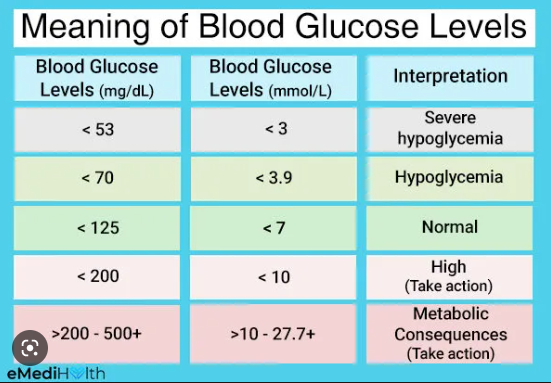

In [94]:
def DiabetesLevel_assigner(g:float):
  """A function that returns the DiabetesLevel
     by taking blood glucose levels as an input."""
  if g<53:                      #Severe Hypoglycemia
    return 1
  elif g>52 and g<70:           #Hypoglycemia
    return 2 
  elif g>69 and g<125:          #Normal
    return 3
  elif g>124 and g<200:         #Pre Diabetic
    return 4
  elif g>199:                   #Severe Diabetes
    return 5  

In [95]:
#Creating the Diabetes Level column
cvd_df['DiabetesLevel'] = cvd_df['glucose'].apply(lambda x: DiabetesLevel_assigner(x))

In [96]:
#Removing columns upon whom grouping has been done
cvd_df.drop(columns={'diabetes','glucose'},axis=1,inplace=True)

In [97]:
#Checking if the DiabetesLevel column has been created properly 
cvd_df.head()

,id,age,education,sex,BPMeds,prevalentStroke,prevalentHyp,totChol,BMI,heartRate,TenYearCHD,SmokeLevel,BPLevel,DiabetesLevel
1,1,36,4.0,1,0.0,0,1,212.0,29.77,72.0,0,1,4,3
2,2,46,1.0,0,0.0,0,0,250.0,20.35,88.0,0,2,1,3
3,3,50,1.0,1,0.0,0,1,233.0,28.26,68.0,1,3,3,3
4,4,64,1.0,0,0.0,0,0,241.0,26.42,70.0,0,4,3,3
5,5,61,3.0,0,0.0,0,1,272.0,32.80,85.0,1,1,5,2


As we can see the "DiabetesLevel" column has been created properly and with correct values.

###<b>Checking correlation for feature removal:</b>

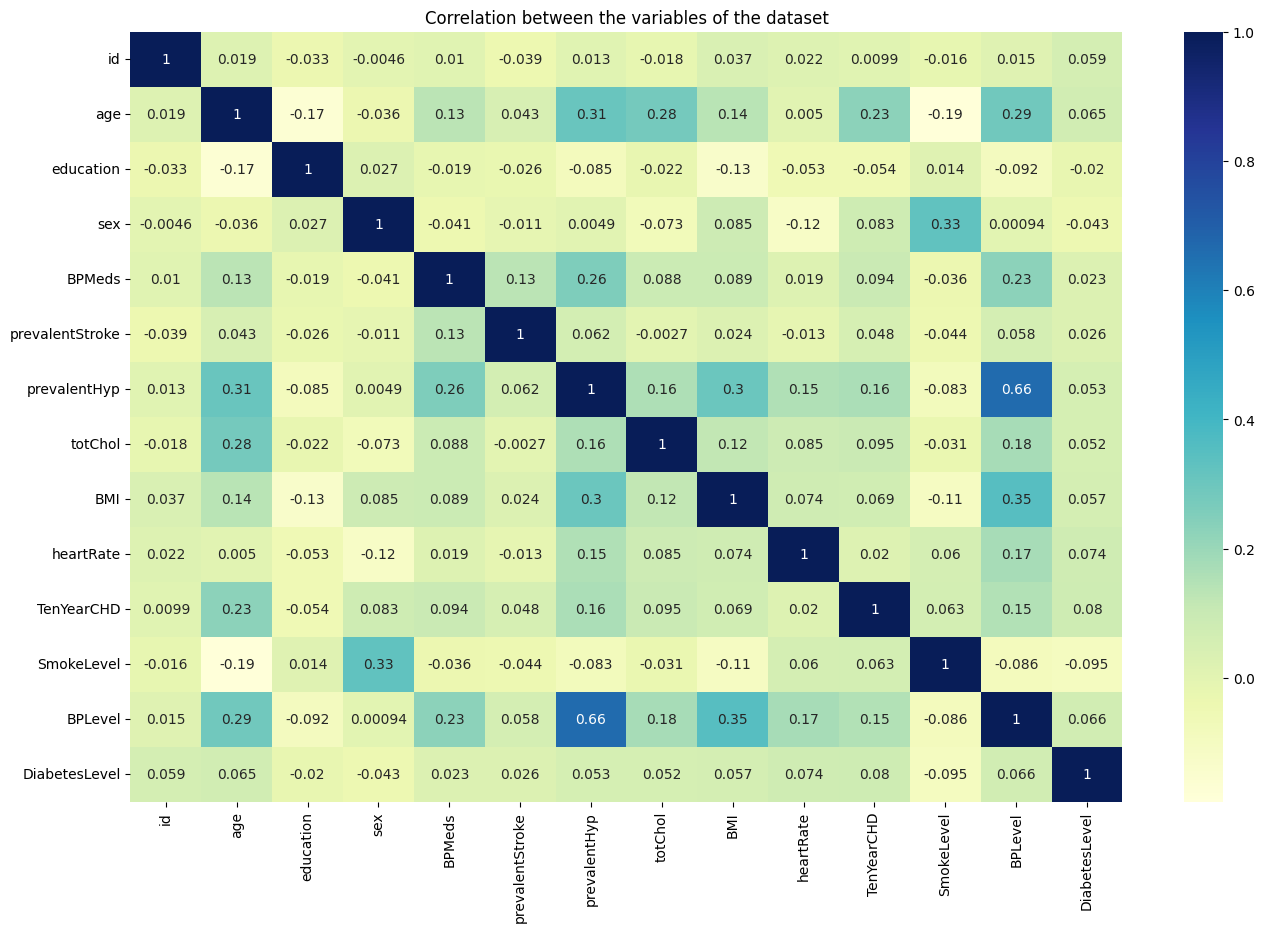

In [100]:
#Plotting correlation matrix using sns.heatmap()
corr_matrix = cvd_df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')
plt.title("Correlation between the variables of the dataset")
plt.show()

<b>As we can see, for majority of the variables there is no high correlation. But, we can also see that there is high correlation between "prevalentHyp" and "BPLevel". Practically speaking there is a direct relation between the two medically and therefore we can remove one of them. I'll remove the "prevalentHyp" column.</b>

In [101]:
#Removing the prevalentHyp column to reduce correlation
cvd_df.drop('prevalentHyp',axis=1,inplace=True)

### <b>Checking the distribution of the data:</b> 

This is done so that we can remove varibales that will not contribute significantly in predicting the target variable.

In [102]:
#Creating a list of all the independent variables
idp_cols=list(set(cvd_df.columns)-{'TenYearCHD'})

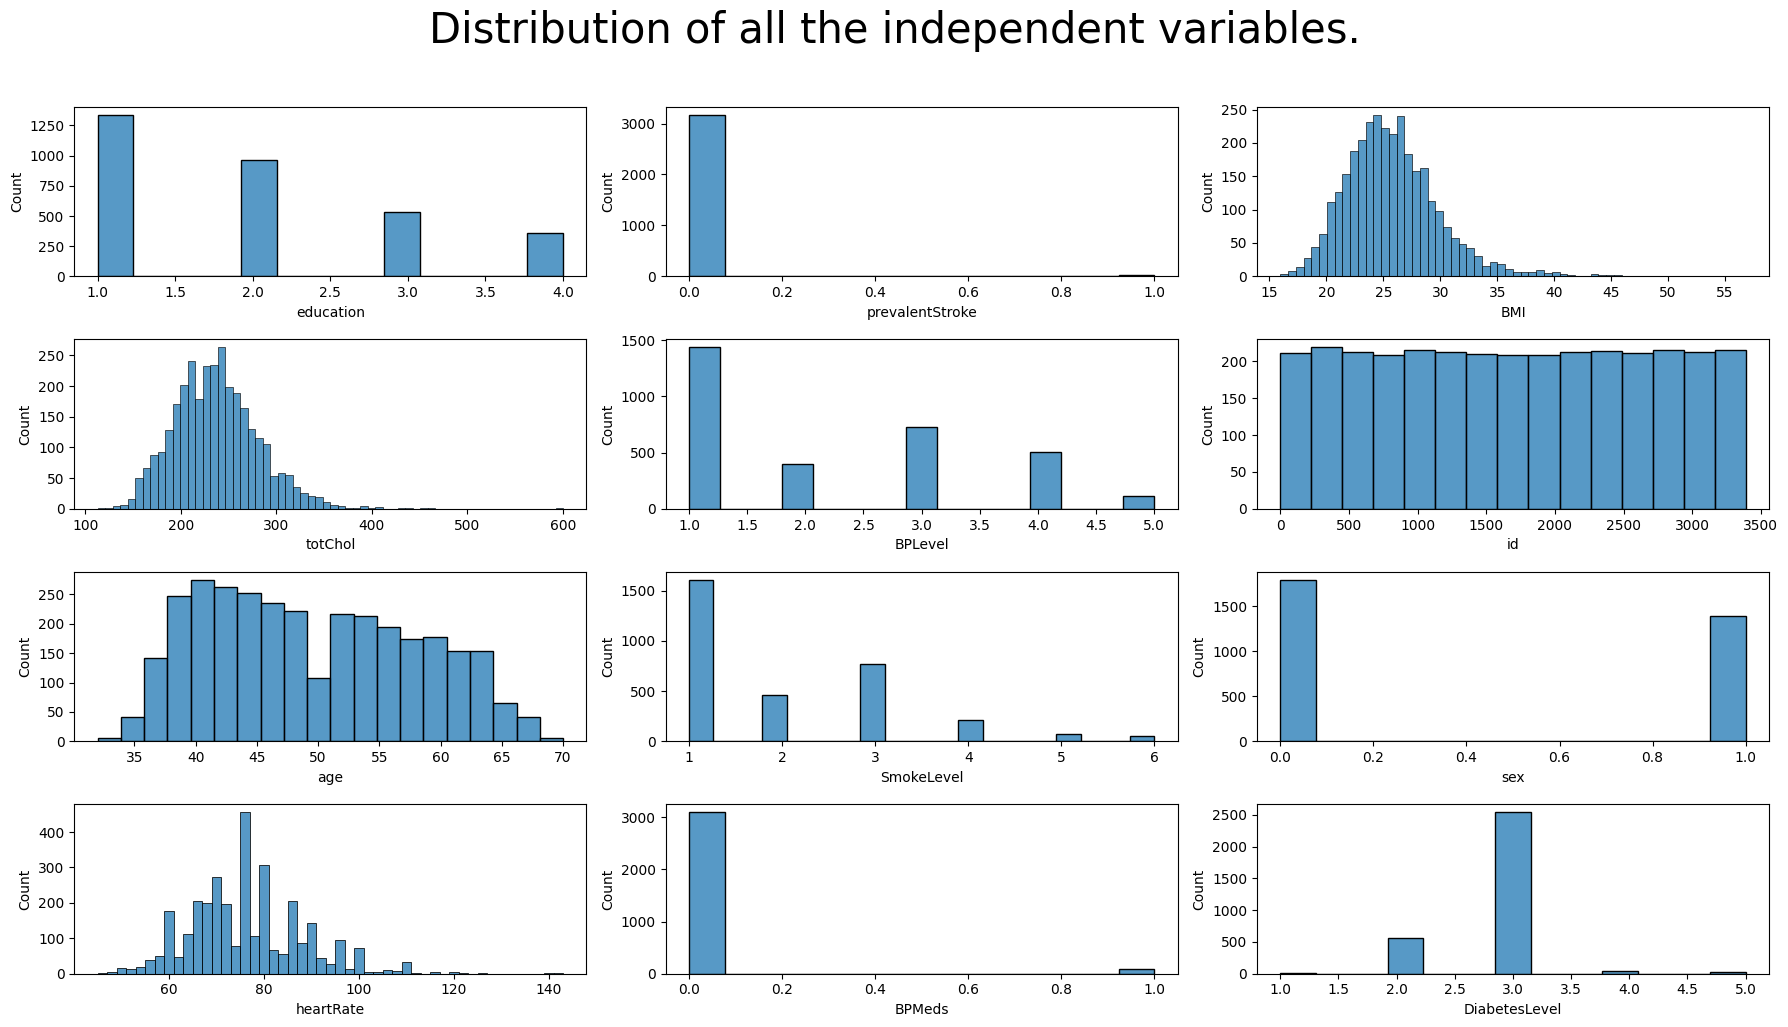

In [104]:
#Plotting the distribution of the independent variables using sns.histplot()
plt.figure(figsize=(18,10))
plt.suptitle('Distribution of all the independent variables.',va='bottom',size=30)
for index, item in enumerate(idp_cols):
  plt.subplot(4,3,index+1)
  sns.histplot(data=cvd_df,x=item)
plt.tight_layout()

As we can see from the distribution, there is a high class imbalance for the columns BPMeds and prevalentStroke, so they won't be able to impact the prediction of the target variable much and therefore we'll delete them.

From the EDA process we also saw that Education is not a great contributing factor, therefore I'll remove the education column also. 

In [105]:
#Removing useless columns
cvd_df.drop(columns={'BPMeds','prevalentStroke','education'},axis=1,inplace=True)

## <b>5. Pre processing of the data:</b>

### <b>Dealing with class imbalance:</b>

A dataset is imbalanced if the classification categories are not approximately equally represented. This affects the quality of our machine larning model and also causes a mistake of classifying the minority class as the majority class. Therefore we will try to deal with this class imbalance if it exists in our dataset.

In [106]:
#Checking for class imbalance for the target variable 
cvd_df['TenYearCHD'].value_counts()

0    2714
1     475
Name: TenYearCHD, dtype: int64

# As we can see, there is a high class imbalance here.

Techniques to solve class imbalance:
1. Resampling (undersampling or oversampling)
2. SMOTE
3. Using BalancedBaggingClassifier.
4. and many more....

In this project, to deal with class imbalance I will be using the SMOTE technique(synthetic minority oversampling technique).